In [1]:
from proxy_methods_final import *
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_rel


c:\Users\dsvin\Desktop\ACF\ATCF\proxy_methods_final.py:1334: SyntaxWarning: invalid escape sequence '\('
  """


In [2]:
# set global plotting format
plt.style.use('seaborn-v0_8-bright')
plt.style.use('seaborn-v0_8-darkgrid')

# Load data

In [3]:
#Original Prices data
#-----------------------------------------
prices_data = pd.read_csv('data/reshaped_data.csv')
prices_data['Date'] = pd.to_datetime(prices_data['Date'], infer_datetime_format=True)
prices_data = prices_data.set_index('Date')

#Cleaned Prices data
#-----------------------------------------
prices_data_cleaned = pd.read_csv('data/new_reshaped_data.csv')
prices_data_cleaned['Date'] = pd.to_datetime(prices_data_cleaned['Date'], infer_datetime_format=True)
prices_data_cleaned = prices_data_cleaned.set_index('Date')


#Index data
#-----------------------------------------
index_data = pd.read_csv('ITRAXX-Europe Timeseries 20241127.csv') #To be used for b0
index_data.rename(columns={'AsOf':'Date'}, inplace=True)
try:
    index_data['Date'] = pd.to_datetime(index_data['Date'], format='%d-%b-%y')
except Exception as e:
    index_data['Date'] = pd.to_datetime(index_data['Date'], format='%d/%b/%y')
index_data = index_data.sort_values(by='Date', ascending=True)

#Metadata
#-----------------------------------------
metadata = pd.read_csv('data/metadata.csv')

#Cleaned Metadata 

metadata_cleaned_before_aggregation = pd.read_csv('data/new_metadata_before_aggregation.csv')
metadata_cleaned_after_aggregation = pd.read_csv('data/new_metadata_after_aggregation.csv')


In [4]:
metadata_cleaned_after_aggregation

,Ticker,ShortName,Sector,Region,Country,AverageRating
0,ABE,Abertis Infraestructuras SA,Cyclical,Europe,Spain,medium
1,ABHLTD,Alliance Boots Hldgs Ltd,Cyclical,Europe,United Kingdom,medium
2,ACAFP,Cr Agricole SA,Financials,Europe,France,low
3,ACAFP-CIB,Cr Agricole Corporate and Invt Bk,Financials,Europe,France,medium
4,ACCOR,ACCOR,Cyclical,Europe,France,medium
...,...,...,...,...,...,...
263,WENL,WENDEL,Financials,Europe,France,medium
264,WOLKLU,Wolters Kluwer N V,Cyclical,Europe,Netherlands,medium
265,WPPGRP-2005,WPP 2005 Ltd,Cyclical,Europe,United Kingdom,high
266,YORPOW,Yorkshire Pwr Gp Ltd,Non Cyclical,Europe,United Kingdom,medium


# Compare errors 
---

### *  Before clean
---

In [5]:
# # BEFORE CLEANING
# #-----------------------------------------


# #Community detection
# correlation_matrix,T,N,company_names = create_correlation_matrix('data/eur_data_standardized_returns.csv')
# C_g = calculate_C_g(correlation_matrix, T, N)
# result_communities, company_communities, modularities = recursive_spectral_method(C_g, correlation_matrix, company_names, min_size=2, modularity_threshold=0.00001)




In [6]:
# #Get matching dates in price data and index data
# #-----------------------------------------
# price_dates = prices_data.index.tolist()

# #Extract date portion of the datetime object in the price data
# index_dates = index_data['Date'].tolist()

# matching_dates = [date for date in price_dates if date in index_dates]

In [7]:
# for community in company_communities:
#     print(community)

In [8]:
# tickers = prices_data.columns.to_list() #All tickers

# #One date
# #-----------
# dates = matching_dates[0:20] #First date

# proxy_time_series_df = calculate_proxy_time_series(tickers, metadata, company_communities, prices_data, index_data, dates)


In [9]:
# prices_data['IFX-HldgBV']

In [10]:
# error_type='MAPE'
# error_intersection_normal_list, error_intersection_communities_list, error_csra_normal_list, error_csra_communities_list = calculate_error_curves(proxy_time_series_df, dates,error_type=error_type)

In [11]:
# #Plot error curves for normal and community 
# error_type='MAPE'
# plot_error_curves(error_csra_normal_list, error_csra_communities_list, dates, method ="CSRA", error_type=error_type)

In [12]:
# #Plot error curves for normal and community 
# error_type='MAPE'
# plot_error_curves(error_intersection_normal_list, error_intersection_communities_list, dates, method ="Intersection", error_type=error_type)

In [13]:
# errors_df_before_clean = pd.DataFrame({'Data': 'Before Processing','Intersection Normal': error_intersection_normal_list, 'Intersection Communities': error_intersection_communities_list, 'CSRA Normal': error_csra_normal_list, 'CSRA Communities': error_csra_communities_list})
# errors_df_before_clean

In [14]:
# #Calculate absolute percentage error for each ticker

# proxy_time_series_df['Proxy_Intersection_normal_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_Intersection'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_Intersection_communities_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_Intersection_Community'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_CSRA_normal_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_CSRA'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_CSRA_communities_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_CSRA_Community'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df

In [15]:
# #Print lowest and highest absolute percentage error for each proxy. Include the ticker and the error

# lowest_error_intersection_normal = proxy_time_series_df['Proxy_Intersection_normal_erros'].idxmin()
# highest_error_intersection_normal = proxy_time_series_df['Proxy_Intersection_normal_erros'].idxmax()

# lowest_error_intersection_communities = proxy_time_series_df['Proxy_Intersection_communities_erros'].idxmin()
# highest_error_intersection_communities = proxy_time_series_df['Proxy_Intersection_communities_erros'].idxmax()

# lowest_error_csra_normal = proxy_time_series_df['Proxy_CSRA_normal_erros'].idxmin()
# highest_error_csra_normal = proxy_time_series_df['Proxy_CSRA_normal_erros'].idxmax()

# lowest_error_csra_communities = proxy_time_series_df['Proxy_CSRA_communities_erros'].idxmin()
# highest_error_csra_communities = proxy_time_series_df['Proxy_CSRA_communities_erros'].idxmax()

# print(f'Lowest error for Intersection Normal: {lowest_error_intersection_normal} with error {proxy_time_series_df["Proxy_Intersection_normal_erros"].min()}')
# print(f'Highest error for Intersection Normal: {highest_error_intersection_normal} with error {proxy_time_series_df["Proxy_Intersection_normal_erros"].max()}')

# print(f'Lowest error for Intersection Communities: {lowest_error_intersection_communities} with error {proxy_time_series_df["Proxy_Intersection_communities_erros"].min()}')
# print(f'Highest error for Intersection Communities: {highest_error_intersection_communities} with error {proxy_time_series_df["Proxy_Intersection_communities_erros"].max()}')

# print(f'Lowest error for CSRA Normal: {lowest_error_csra_normal} with error {proxy_time_series_df["Proxy_CSRA_normal_erros"].min()}')
# print(f'Highest error for CSRA Normal: {highest_error_csra_normal} with error {proxy_time_series_df["Proxy_CSRA_normal_erros"].max()}')

# print(f'Lowest error for CSRA Communities: {lowest_error_csra_communities} with error {proxy_time_series_df["Proxy_CSRA_communities_erros"].min()}')
# print(f'Highest error for CSRA Communities: {highest_error_csra_communities} with error {proxy_time_series_df["Proxy_CSRA_communities_erros"].max()}')


In [16]:
# proxy_time_series_df.loc[highest_error_csra_communities]

# Before aggregation vs after aggregation
---

In [17]:
#Community detection
#-----------------------------------------
correlation_matrix,T,N,company_names = create_correlation_matrix('data/new_eur_data_standardized_returns.csv')
C_g = calculate_C_g(correlation_matrix, T, N)
result_communities, company_communities, modularities = recursive_spectral_method(C_g, correlation_matrix, company_names, min_size=2, modularity_threshold=0.00001)

In [18]:
for community in company_communities:
    print(community)

['ACCOR', 'AIRLIQ', 'AKZO', 'ALSTOM', 'ATSPA', 'AZN', 'BAD', 'BAPLC', 'BASFSE', 'BATSLN', 'BMW', 'BOUY', 'BPLN', 'BRITEL-BritTel', 'BYIF', 'CARR', 'CENTRI', 'CLAR', 'CONTI', 'CPGLN', 'DAMLR', 'DANONE', 'DEXO', 'DIAG', 'DT', 'EDF', 'ELTLX', 'ENI', 'EXPGRL-EXPFIN', 'FORTUM', 'FSEKGA', 'GSK', 'HEI', 'HEIANA', 'HOFP', 'ITV', 'KDSM', 'KPN', 'LINDE', 'LNX', 'LUFTHA', 'MKS-M+SPlc', 'MOET', 'NESTLE', 'NGP', 'NXT', 'PERNOD', 'PEUGOT', 'PSON', 'PUBFP', 'RDSPLC', 'RENAUL', 'RNTKIL', 'ROLLS', 'SBRY', 'SIEM', 'SOLVAY', 'STGOBN', 'STM', 'STORA', 'SYNNVX', 'TATELN', 'TELNOR', 'TKA', 'TKAGR', 'TOTALN', 'TSCO', 'ULVR', 'UPMKYM', 'UU', 'VEOLIA', 'VINCI', 'VIVNDI', 'VLOF', 'VLVY', 'VOD', 'VW', 'WENL', 'WOLKLU', 'WPPGRP-2005']
['ACAFP', 'AEGON', 'ALZSE', 'ASSGEN', 'AVLN', 'AXAF', 'BACR-Bank', 'BACRED', 'BBVSM', 'BFCM', 'BNP', 'CMZB', 'CSGAG', 'DANBNK', 'DB', 'EDP', 'ENEL', 'IBERDU', 'MUNRE', 'PRUFIN', 'SANPAO', 'SANTNDR', 'SOCGEN', 'STAN-Bank', 'SWREL', 'TELEFO', 'TIIMN', 'UBS', 'USPA', 'ZINCO']
['ABE', '

In [19]:
#Get matching dates in price data and index data
#-----------------------------------------
price_dates = prices_data_cleaned.index.tolist()

#Extract date portion of the datetime object in the price data
index_dates = index_data['Date'].tolist()

matching_dates = [date for date in price_dates if date in index_dates]

### Before aggregation

In [20]:
tickers = prices_data_cleaned.columns.to_list() #All tickers

#One date
#-----------

#Take dates by skipping every 100 dates in the matching dates

dates = matching_dates[0:20]


proxy_time_series_df_before_aggregation = calculate_proxy_time_series_extra_coeff(tickers, metadata_cleaned_before_aggregation, company_communities, prices_data_cleaned, index_data, dates)


In [21]:
error_type='MAPE'
error_intersection_normal_list, error_intersection_communities_list, error_csra_normal_list, error_csra_communities_list = calculate_error_curves(proxy_time_series_df_before_aggregation, dates,error_type=error_type)

#Create dataframe to store errors

In [22]:
errors_df_before_aggregation = pd.DataFrame({'Date':dates,'Intersection Normal': error_intersection_normal_list, 'Intersection Communities': error_intersection_communities_list, 'CSRA Normal': error_csra_normal_list, 'CSRA Communities': error_csra_communities_list})

errors_df_before_aggregation.to_csv('data/errors_df_before_aggregation.csv', index=False)

### After aggregation

In [23]:
tickers = prices_data_cleaned.columns.to_list() #All tickers

#One date
#-----------
#dates = matching_dates[::100]
dates = matching_dates[0:20]


proxy_time_series_df_after_aggregation = calculate_proxy_time_series_extra_coeff(tickers, metadata_cleaned_after_aggregation, company_communities, prices_data_cleaned, index_data, dates)


In [24]:
proxy_time_series_df_after_aggregation

,Ticker,Date,Actual_Spread,Proxy_Intersection,Proxy_Intersection_Community,Proxy_CSRA,Proxy_CSRA_Community
0,ABE,2010-09-14,252.500000,191.274580,191.274580,161.171988,168.059320
1,ABE,2010-09-15,253.553505,183.972671,183.972671,160.412730,167.022951
2,ABE,2010-09-16,253.478186,180.312309,180.312309,160.048799,166.949686
3,ABE,2010-09-17,253.417889,178.475907,178.475907,158.912455,166.060293
4,ABE,2010-09-20,250.460282,177.564172,177.564172,158.649351,164.766319
...,...,...,...,...,...,...,...
5355,ZINCO,2010-10-05,99.833333,101.583333,101.583333,74.655549,71.128143
5356,ZINCO,2010-10-06,96.666667,95.416667,95.416667,72.745666,69.167069
5357,ZINCO,2010-10-07,97.125000,95.333333,95.333333,71.929173,68.486315
5358,ZINCO,2010-10-08,93.968872,91.000000,91.000000,71.165247,66.539542


In [25]:
error_type='MAPE'
error_intersection_normal_list, error_intersection_communities_list, error_csra_normal_list, error_csra_communities_list = calculate_error_curves(proxy_time_series_df_after_aggregation, dates,error_type=error_type)

#Create dataframe to store errors

In [26]:
errors_df_after_aggregation = pd.DataFrame({'Date':dates,'Intersection Normal': error_intersection_normal_list, 'Intersection Communities': error_intersection_communities_list, 'CSRA Normal': error_csra_normal_list, 'CSRA Communities': error_csra_communities_list})

errors_df_after_aggregation.to_csv('data/errors_df_after_aggregation.csv', index=False)

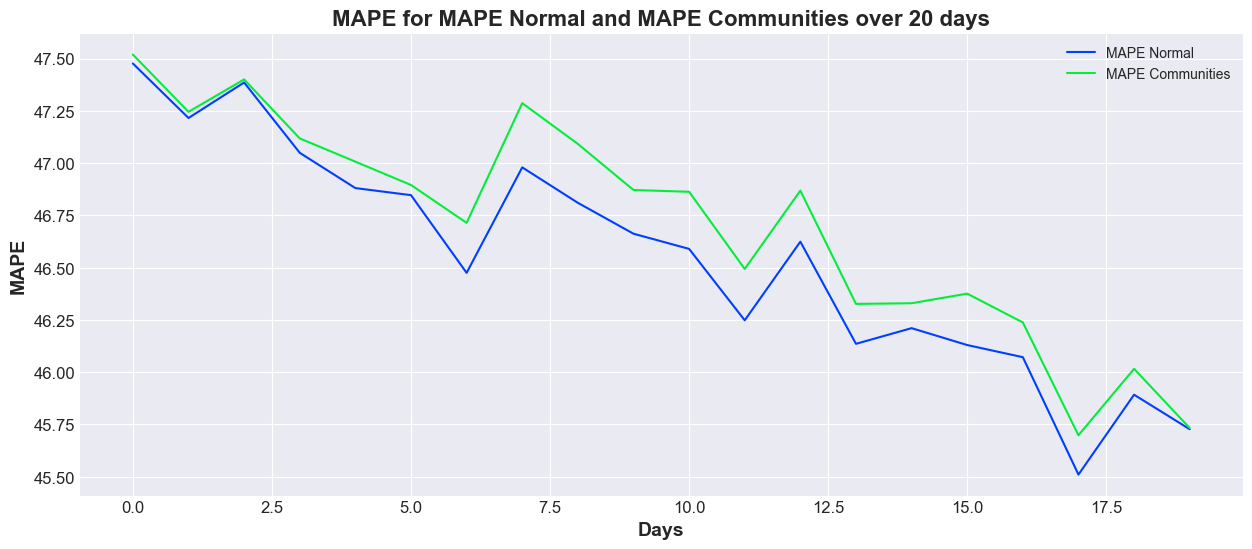

In [27]:
plot_error_curves(error_csra_normal_list, error_csra_communities_list, dates, method ="MAPE", error_type=error_type)

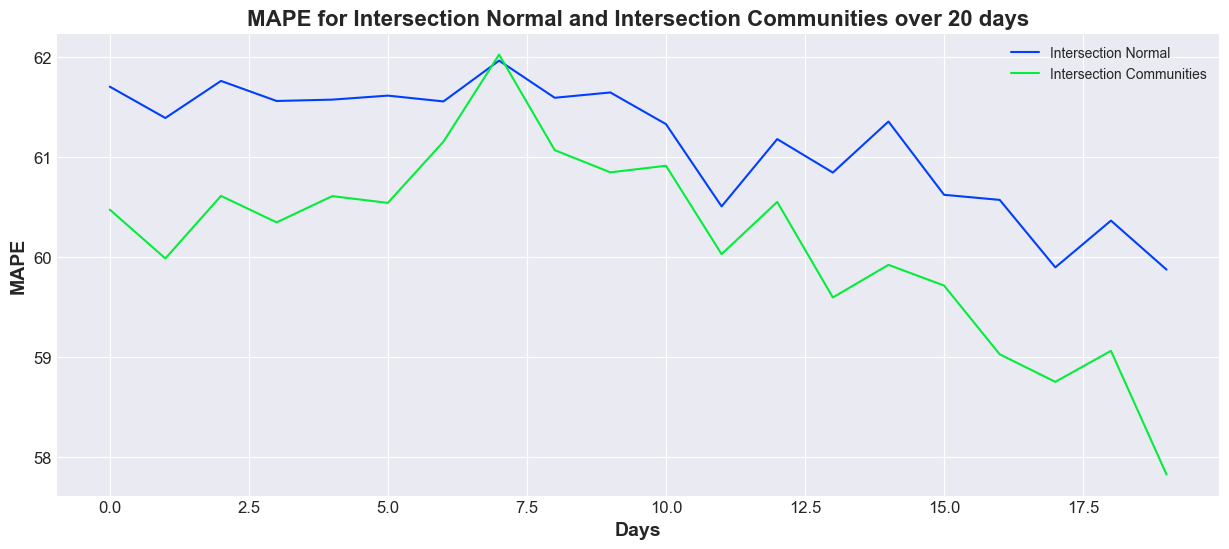

In [28]:
plot_error_curves(error_intersection_normal_list, error_intersection_communities_list, dates, method ="Intersection", error_type=error_type)

In [29]:
# errors_df_after_clean = pd.DataFrame({'Date':dates,'Intersection Normal': error_intersection_normal_list, 'Intersection Communities': error_intersection_communities_list, 'CSRA Normal': error_csra_normal_list, 'CSRA Communities': error_csra_communities_list})
# errors_df_after_clean

In [30]:
# #Calculate absolute percentage error for each ticker

# proxy_time_series_df['Proxy_Intersection_normal_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_Intersection'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_Intersection_communities_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_Intersection_Community'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_CSRA_normal_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_CSRA'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_CSRA_communities_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_CSRA_Community'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df

In [31]:
# #Print lowest and highest absolute percentage error for each proxy. Include the ticker and the error

# lowest_error_intersection_normal = proxy_time_series_df['Proxy_Intersection_normal_erros'].idxmin()
# highest_error_intersection_normal = proxy_time_series_df['Proxy_Intersection_normal_erros'].idxmax()

# lowest_error_intersection_communities = proxy_time_series_df['Proxy_Intersection_communities_erros'].idxmin()
# highest_error_intersection_communities = proxy_time_series_df['Proxy_Intersection_communities_erros'].idxmax()

# lowest_error_csra_normal = proxy_time_series_df['Proxy_CSRA_normal_erros'].idxmin()
# highest_error_csra_normal = proxy_time_series_df['Proxy_CSRA_normal_erros'].idxmax()

# lowest_error_csra_communities = proxy_time_series_df['Proxy_CSRA_communities_erros'].idxmin()
# highest_error_csra_communities = proxy_time_series_df['Proxy_CSRA_communities_erros'].idxmax()

# print(f'Lowest error for Intersection Normal: {lowest_error_intersection_normal} with error {proxy_time_series_df["Proxy_Intersection_normal_erros"].min()}')
# print(f'Highest error for Intersection Normal: {highest_error_intersection_normal} with error {proxy_time_series_df["Proxy_Intersection_normal_erros"].max()}')

# print(f'Lowest error for Intersection Communities: {lowest_error_intersection_communities} with error {proxy_time_series_df["Proxy_Intersection_communities_erros"].min()}')
# print(f'Highest error for Intersection Communities: {highest_error_intersection_communities} with error {proxy_time_series_df["Proxy_Intersection_communities_erros"].max()}')

# print(f'Lowest error for CSRA Normal: {lowest_error_csra_normal} with error {proxy_time_series_df["Proxy_CSRA_normal_erros"].min()}')
# print(f'Highest error for CSRA Normal: {highest_error_csra_normal} with error {proxy_time_series_df["Proxy_CSRA_normal_erros"].max()}')

# print(f'Lowest error for CSRA Communities: {lowest_error_csra_communities} with error {proxy_time_series_df["Proxy_CSRA_communities_erros"].min()}')
# print(f'Highest error for CSRA Communities: {highest_error_csra_communities} with error {proxy_time_series_df["Proxy_CSRA_communities_erros"].max()}')


In [32]:
# highest_error_csra_communities = proxy_time_series_df['Proxy_CSRA_communities_erros'].idxmax()

# #print ticker corresponding to highest error

# proxy_time_series_df.loc[highest_error_csra_normal]

# Comparison 
---

In [33]:
# #errors_df = pd.concat([errors_df_before_clean, errors_df_after_clean], ignore_index=True)
# errors_df = errors_df_after_clean
# errors_df

In [34]:
# errors_df.to_csv('data/errors_df_before_aggregation.csv', index=False)

In [35]:
# errors_df.to_csv('data/errors_df_after_aggregation.csv', index=False)

In [36]:
errors_df_before_aggregation = pd.read_csv('data/errors_df_before_aggregation.csv')

errors_df_after_aggregation = pd.read_csv('data/errors_df_after_aggregation.csv')

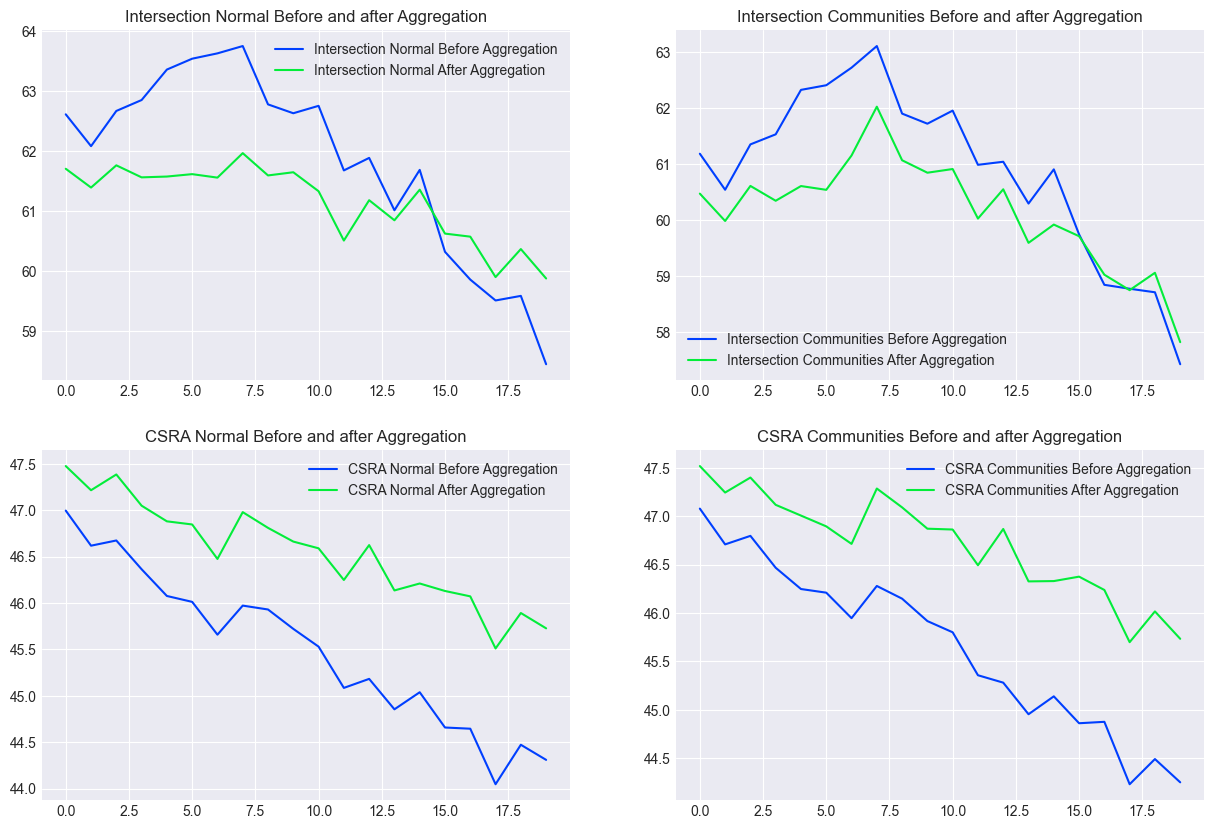

In [37]:
Intersection_normal_before_aggregation = errors_df_before_aggregation['Intersection Normal']
Intersection_communities_before_aggregation = errors_df_before_aggregation['Intersection Communities']
CSRA_normal_before_aggregation = errors_df_before_aggregation['CSRA Normal']
CSRA_communities_before_aggregation = errors_df_before_aggregation['CSRA Communities']

Intersection_normal_after_aggregation = errors_df_after_aggregation['Intersection Normal']
Intersection_communities_after_aggregation = errors_df_after_aggregation['Intersection Communities']
CSRA_normal_after_aggregation = errors_df_after_aggregation['CSRA Normal']
CSRA_communities_after_aggregation = errors_df_after_aggregation['CSRA Communities']

#Plot error curves as sub plots before and after aggregation

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(Intersection_normal_before_aggregation, label='Intersection Normal Before Aggregation')
axs[0,0].plot(Intersection_normal_after_aggregation, label='Intersection Normal After Aggregation')
axs[0, 0].set_title('Intersection Normal Before and after Aggregation')
axs[0, 0].legend()

axs[0, 1].plot(Intersection_communities_before_aggregation, label='Intersection Communities Before Aggregation')
axs[0,1].plot(Intersection_communities_after_aggregation, label='Intersection Communities After Aggregation')
axs[0, 1].set_title('Intersection Communities Before and after Aggregation')
axs[0, 1].legend()

axs[1, 0].plot(CSRA_normal_before_aggregation, label='CSRA Normal Before Aggregation')
axs[1,0].plot(CSRA_normal_after_aggregation, label='CSRA Normal After Aggregation')
axs[1, 0].set_title('CSRA Normal Before and after Aggregation')
axs[1, 0].legend()

axs[1, 1].plot(CSRA_communities_before_aggregation, label='CSRA Communities Before Aggregation')
axs[1,1].plot(CSRA_communities_after_aggregation, label='CSRA Communities After Aggregation')
axs[1, 1].set_title('CSRA Communities Before and after Aggregation')
axs[1, 1].legend()







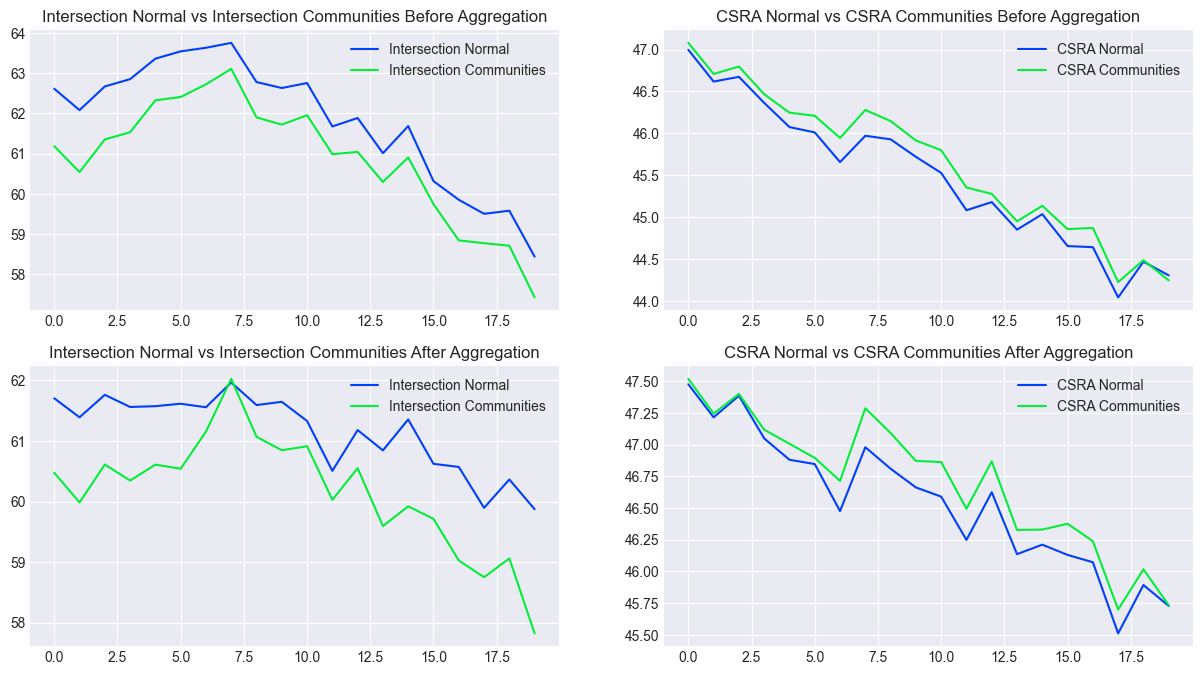

In [38]:
#Compare normal to community after aggregation

Intersection_normal_before_aggregation = errors_df_before_aggregation['Intersection Normal']
Intersection_communities_before_aggregation = errors_df_before_aggregation['Intersection Communities']
CSRA_normal_before_aggregation = errors_df_before_aggregation['CSRA Normal']
CSRA_communities_before_aggregation = errors_df_before_aggregation['CSRA Communities']

Intersection_normal_after_aggregation = errors_df_after_aggregation['Intersection Normal']
Intersection_communities_after_aggregation = errors_df_after_aggregation['Intersection Communities']
CSRA_normal_after_aggregation = errors_df_after_aggregation['CSRA Normal']
CSRA_communities_after_aggregation = errors_df_after_aggregation['CSRA Communities']

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

#Create sub plot with 1 row and 2 columns

axs[0,0].plot(Intersection_normal_before_aggregation, label='Intersection Normal')
axs[0,0].plot(Intersection_communities_before_aggregation, label='Intersection Communities')
axs[0,0].set_title('Intersection Normal vs Intersection Communities Before Aggregation')
axs[0,0].legend()

axs[0,1].plot(CSRA_normal_before_aggregation, label='CSRA Normal')
axs[0,1].plot(CSRA_communities_before_aggregation, label='CSRA Communities')
axs[0,1].set_title('CSRA Normal vs CSRA Communities Before Aggregation')
axs[0,1].legend()

axs[1,0].plot(Intersection_normal_after_aggregation, label='Intersection Normal')
axs[1,0].plot(Intersection_communities_after_aggregation, label='Intersection Communities')
axs[1,0].set_title('Intersection Normal vs Intersection Communities After Aggregation')
axs[1,0].legend()

axs[1,1].plot(CSRA_normal_after_aggregation, label='CSRA Normal')
axs[1,1].plot(CSRA_communities_after_aggregation, label='CSRA Communities')
axs[1,1].set_title('CSRA Normal vs CSRA Communities After Aggregation')
axs[1,1].legend()
